In [39]:
import pandas as pd

# Specify the input file
input_file = '../data/data_clustered.csv'

# Load the clustered data
df = pd.read_csv(input_file)

# Print the first 5 rows
df.head()


,categories,update_date,text,cluster
0,hep-ph,2008-11-26,calculation prompt diphoton production cross s...,6
1,math.CO cs.CG,2008-12-13,sparsity certifying graph decomposition descri...,3
2,physics.gen-ph,2008-01-13,evolution earth moon system dark matter field ...,6
3,math.CO,2007-05-23,determinant stirling cycle number count unlabe...,7
4,math.CA math.FA,2013-10-15,dyadic lambda alpha lambda alpha paper compute...,2


cluster
0    105
1    156
2    406
3     43
4    212
5     96
6    568
7    474
Name: count, dtype: int64


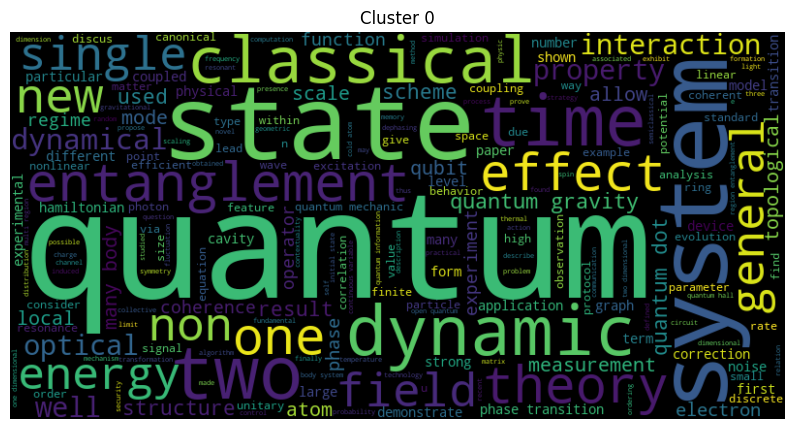

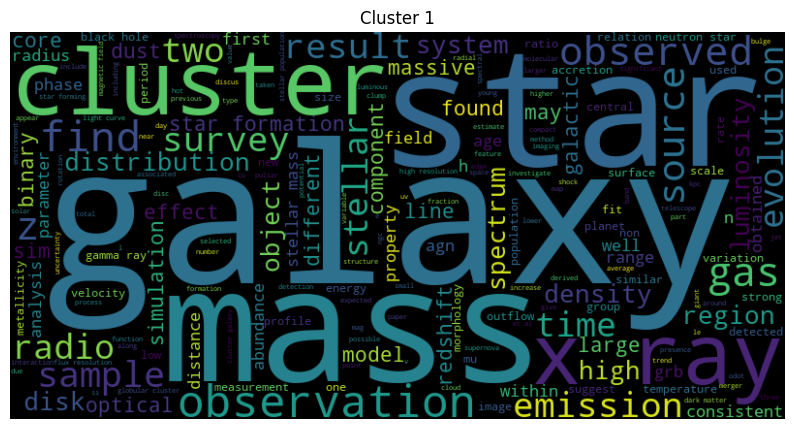

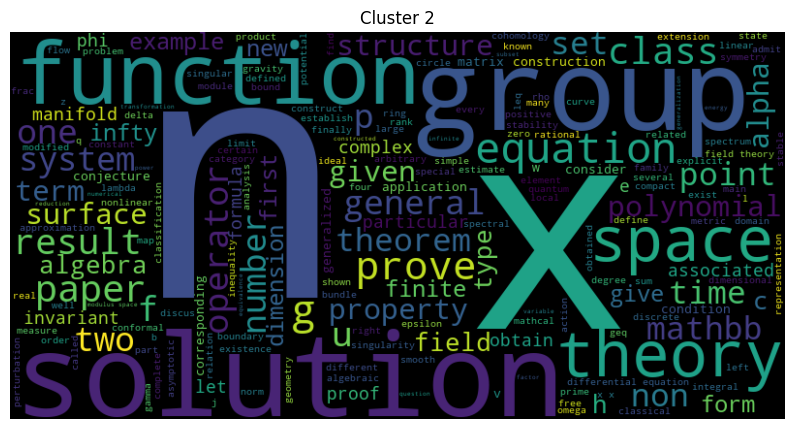

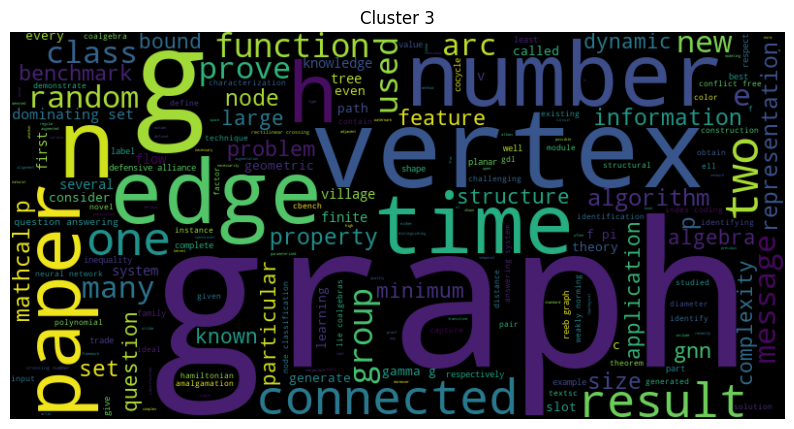

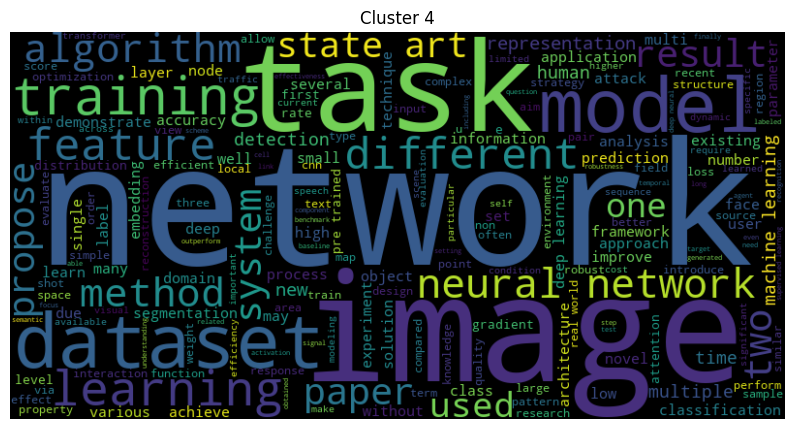

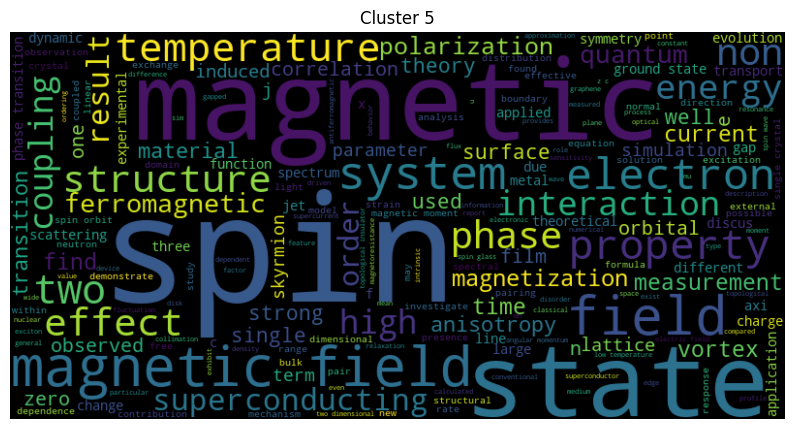

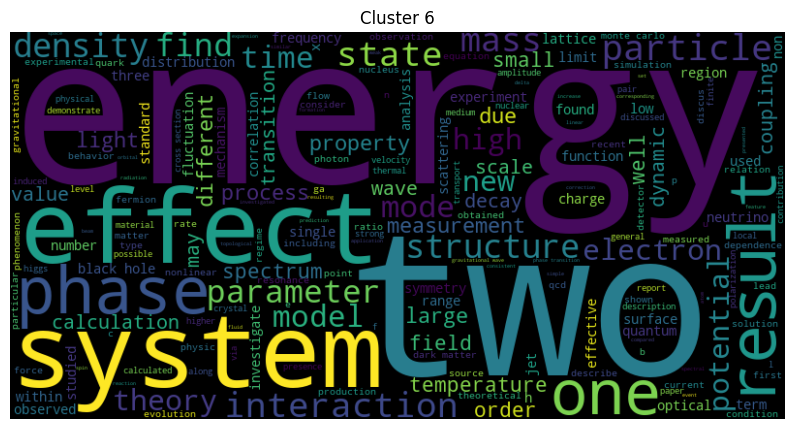

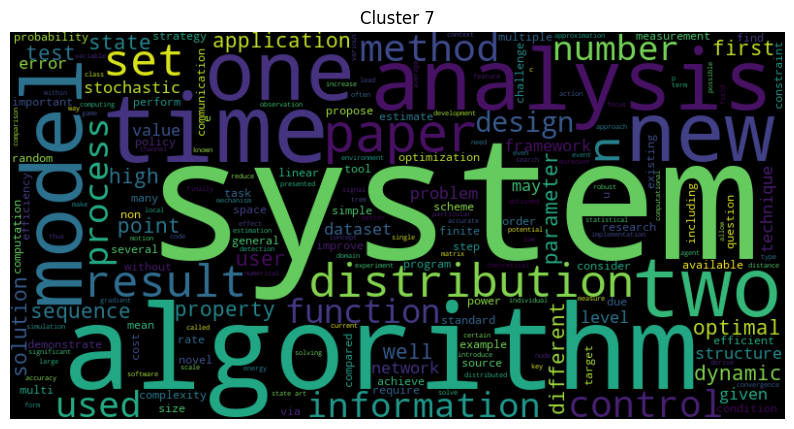

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['text'] = df['text'].fillna('')

# Analyze the distribution of clusters
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

# Generate word clouds for each cluster
for cluster in cluster_counts.index:
    text = ' '.join(df[df['cluster'] == cluster]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')
    plt.show()

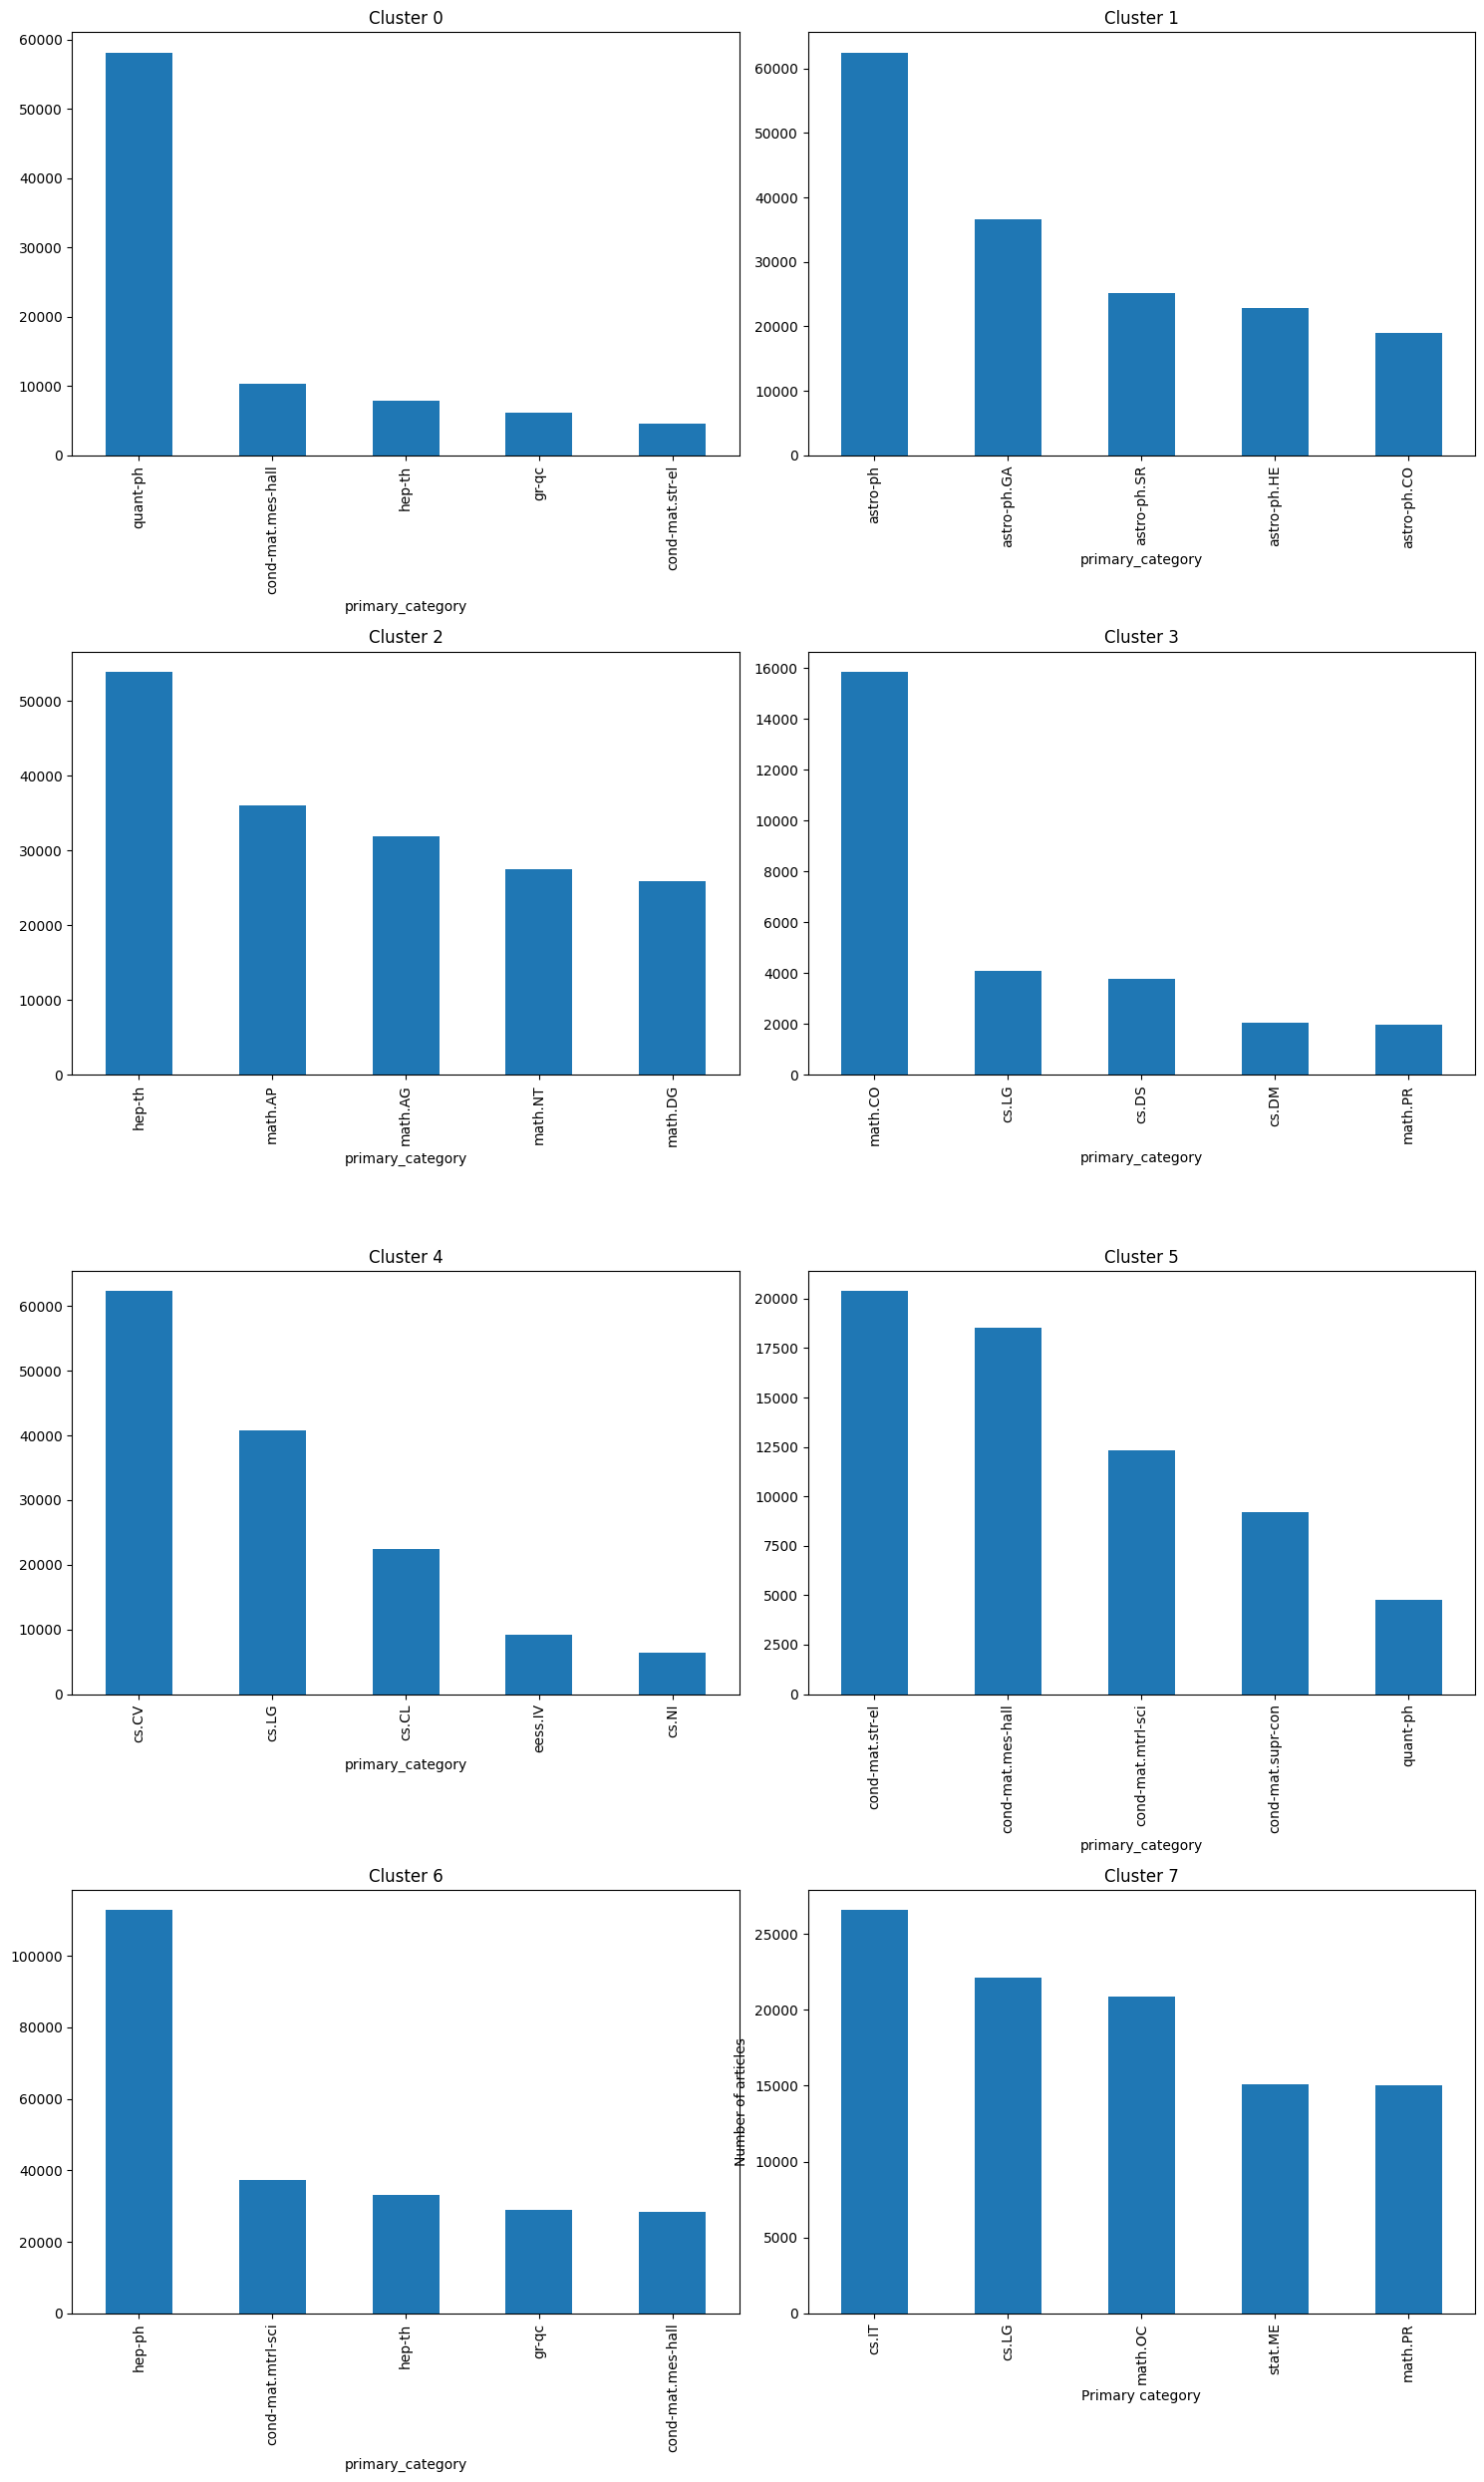

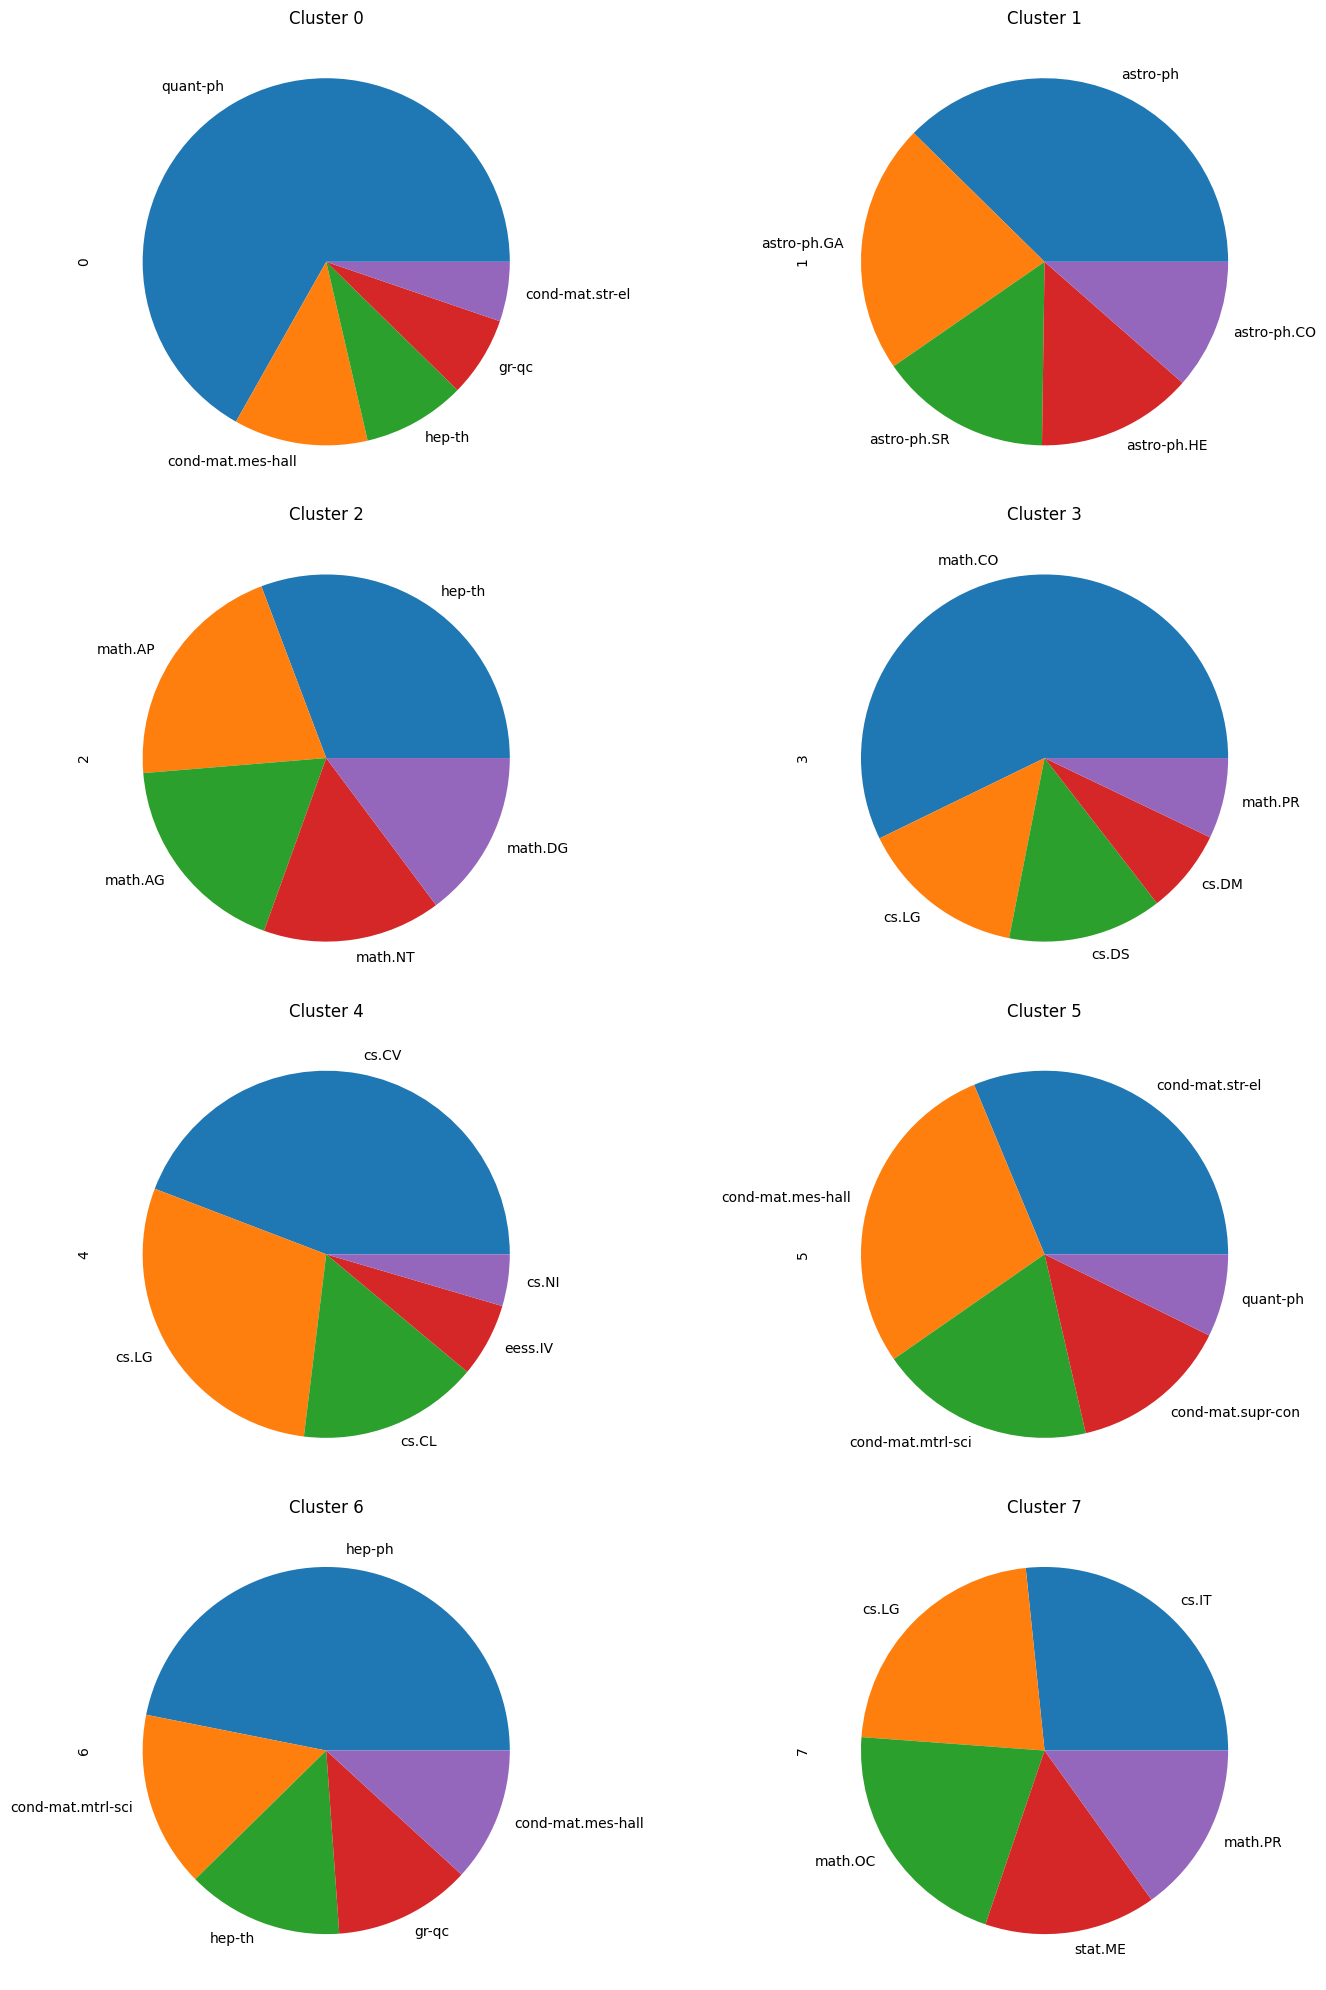

In [42]:
# Extract the primary category of each article
df['primary_category'] = df['categories'].apply(lambda x: x.split()[0])

# Analyze the distribution of primary categories in each cluster
category_counts = df.groupby('cluster')['primary_category'].value_counts()
# Convert the multi-index series to a dataframe
category_counts = category_counts.unstack(level=0).fillna(0)


# Plot the distribution of top 8 primary categories in each cluster using bar charts
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
for i, ax in enumerate(axes.flatten()):
    category_counts[i].sort_values(ascending=False).head(5).plot(kind='bar', ax=ax, title=f'Cluster {i}')
plt.tight_layout()
plt.ylabel('Number of articles')
plt.xlabel('Primary category')
plt.show()

# Plot the distribution of top 5 primary categories in each cluster using pie charts
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for i, ax in enumerate(axes.flatten()):
    category_counts[i].sort_values(ascending=False).head(5).plot(kind='pie', ax=ax, title=f'Cluster {i}', legend=False)
plt.tight_layout()
plt.show()



       count
year        
2007  145892
2008   69343
2009  229063
2010   56214
2011   61844
2012   57301
2013   72027
2014   88119
2015  215104
2016  133625
2017  122520
2018  136216
2019  155680
2020  177519
2021  193583
2022  215220
2023  158885


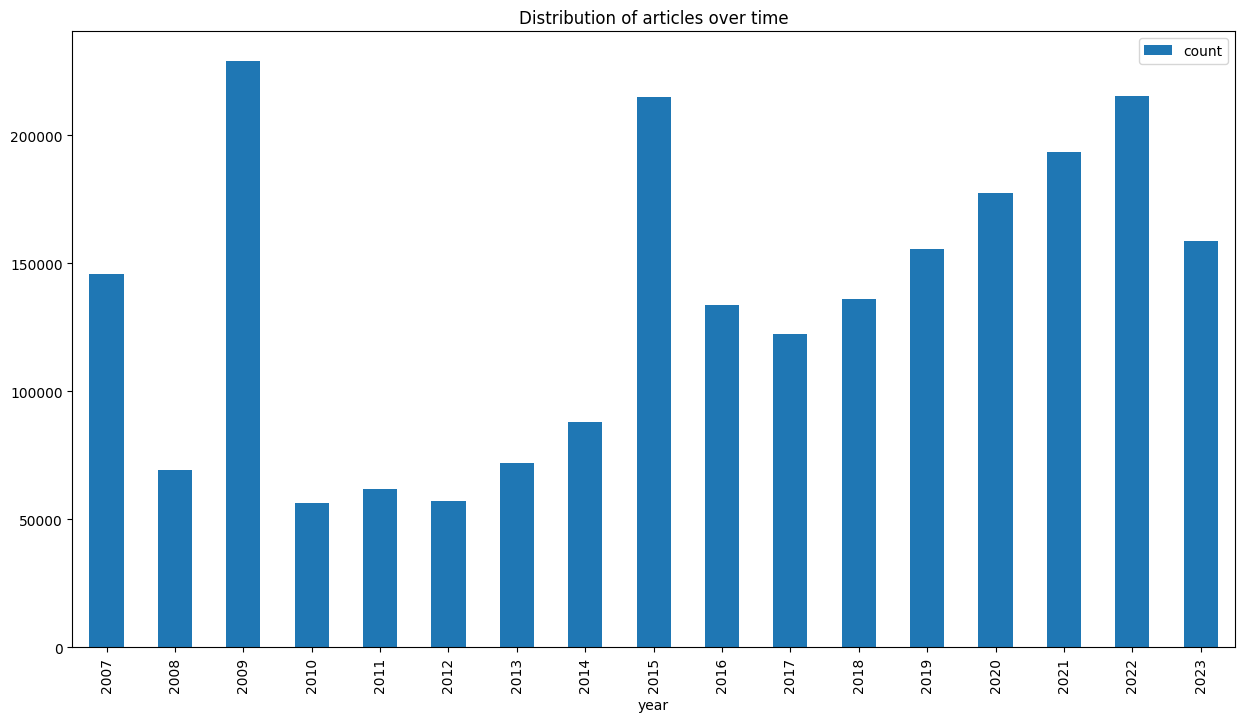

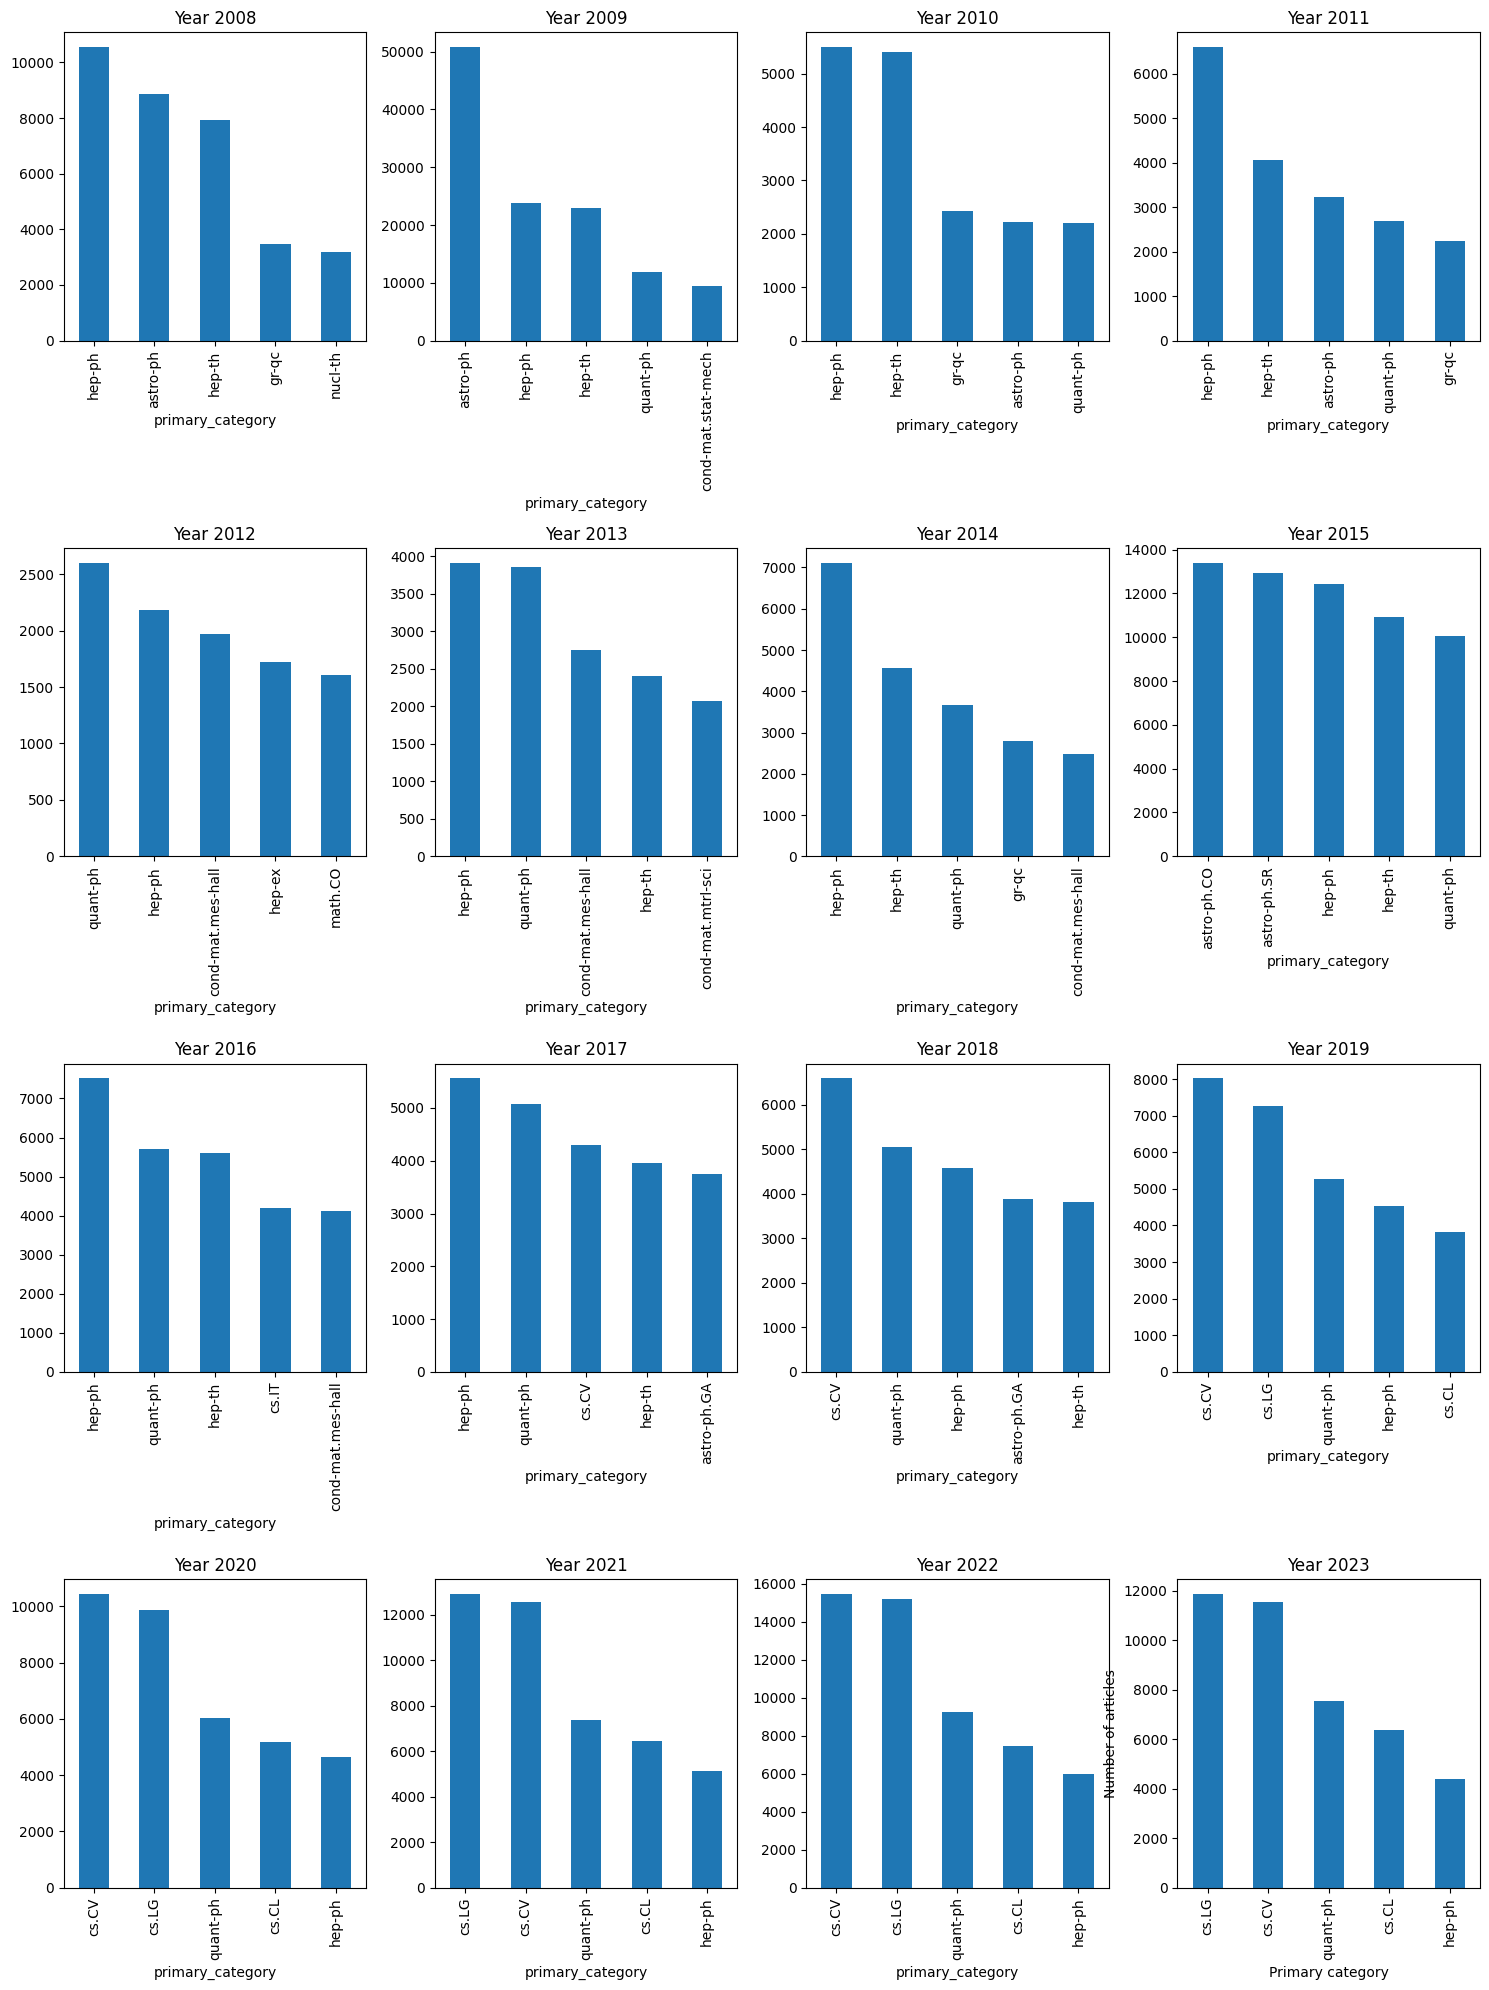

In [57]:
# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Analyze the distribution of articles over time
year_counts = df['year'].value_counts().sort_index()
# Convert the series to a dataframe
year_counts = year_counts.to_frame()
year_counts.columns = ['count']
print(year_counts)

# Plot the distribution of articles over time
year_counts.plot(kind='bar', figsize=(15, 8), title='Distribution of articles over time')
plt.show()


# show the distribution of primary categories of each year using bar charts 
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
for i, ax in enumerate(axes.flatten()):
    df[df['year'] == 2008 + i]['primary_category'].value_counts().head(5).plot(kind='bar', ax=ax, title=f'Year {2008 + i}')
plt.tight_layout()
plt.ylabel('Number of articles')
plt.xlabel('Primary category')
plt.show()



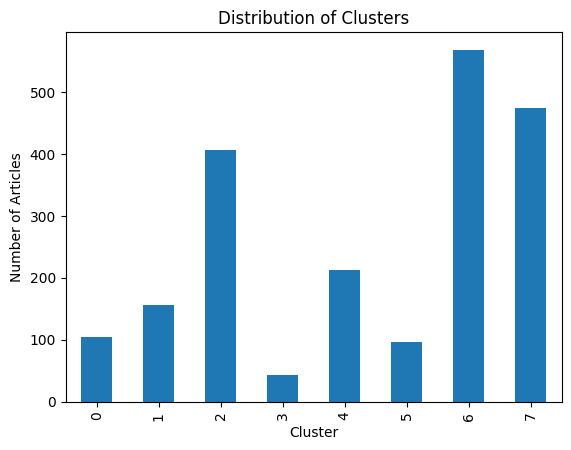

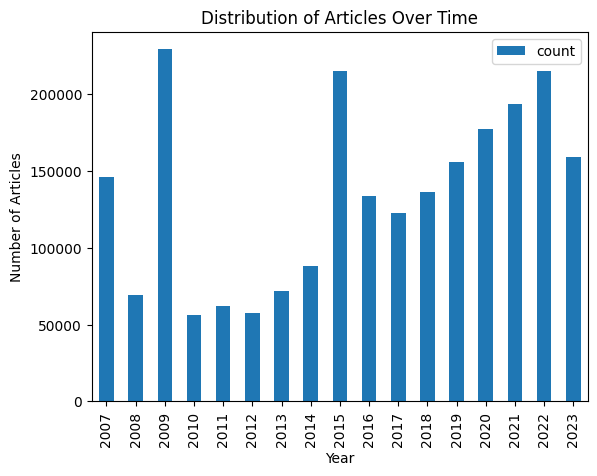

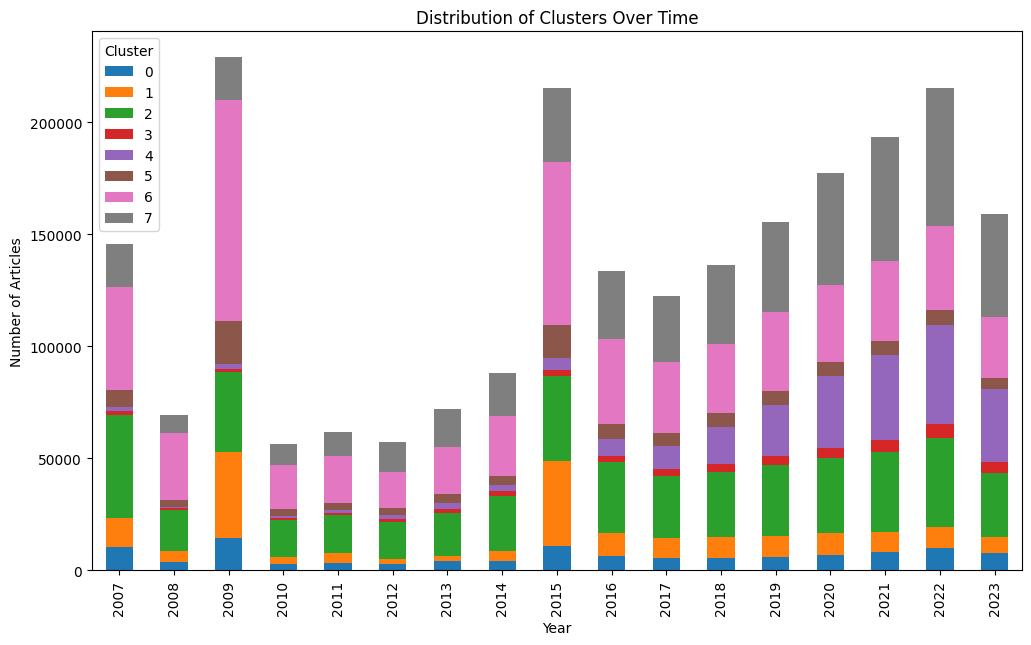

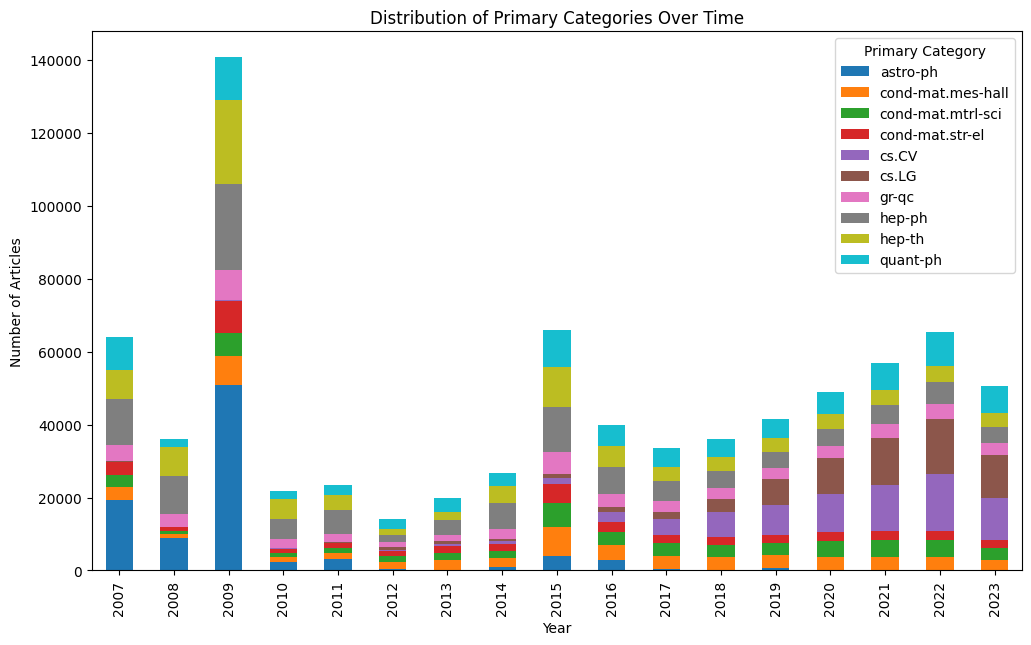

In [61]:
# Visualize the distribution of clusters
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Articles')
plt.title('Distribution of Clusters')
plt.show()

# Visualize the distribution of articles over time
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles Over Time')
plt.show()

# Visualize the distribution of clusters over time
cluster_year_counts.unstack().plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Clusters Over Time')
plt.legend(title='Cluster')
plt.show()

# Visualize the distribution of primary categories over time
top_categories = df['primary_category'].value_counts().index[:10]
category_year_counts = df[df['primary_category'].isin(top_categories)].groupby(['year', 'primary_category'])['primary_category'].count().to_frame()
category_year_counts.columns = ['count']
category_year_counts = category_year_counts.reset_index()
category_year_counts = category_year_counts.pivot(index='year', columns='primary_category', values='count')
category_year_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Primary Categories Over Time')
plt.legend(title='Primary Category')
plt.show()
